In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator # Pour augmenter le nombre de données. 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np
from  scipy import ndimage
from keras import regularizers
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
batch_size = 10 #networks train faster with mini-batches. That's because we update the weights after each propagation.
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
model_name = 'keras_cifar10_trained_model.h5'

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


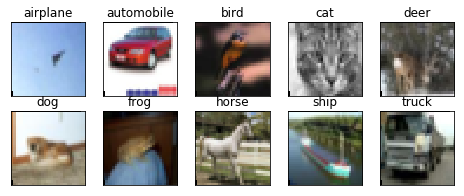

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0] #return elements with conditions, [0] : return index
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0]) #Return random integers (one element)
    im = np.transpose(features_idx[img_num,::], (1, 0, 2))#Permute the dimensions of an array #(height,width,dim)
    rotated_img = ndimage.rotate(im, -90)
    ax.set_title(class_names[i])
    plt.imshow(rotated_img)
   
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
weight_decay = 1e-4 
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization()) #couche avec parametres pour normalization des données en sortie. Highter lr, reduces overfiting. 
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))) #kernel_regularizer: Regularizer function applied to the kernel weights matrix.
#méthode de dégradation des pondérations ou weight decay, pour limiter le surapprentissage.
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4)) #désactiver » des sorties de neurones aléatoirement, force chaque neurone a bien apprendre. 
 
model.add(Flatten()) #donées en 1D pour dense qui suit. 
model.add(Dense(num_classes, activation='softmax'))
# padding = same (input=output= zero padding) or valid (no padding) or causal (for dilated convolution) 

In [7]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [8]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  = x_train/250 #standardized
x_test = x_test/250

In [9]:
history = model.fit(x_train, y_train,
              batch_size=batch_size, 
              epochs=epochs,
              validation_data=(x_test, y_test),
shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 734s 15ms/step - loss: 1.7578 - acc: 0.4840 - val_loss: 1.1899 - val_acc: 0.6410
Epoch 2/10
50000/50000 [==============================] - 743s 15ms/step - loss: 1.0904 - acc: 0.6705 - val_loss: 1.2170 - val_acc: 0.6442
Epoch 3/10
50000/50000 [==============================] - 744s 15ms/step - loss: 0.9625 - acc: 0.7205 - val_loss: 1.0465 - val_acc: 0.6959
Epoch 4/10
50000/50000 [==============================] - 744s 15ms/step - loss: 0.8985 - acc: 0.7487 - val_loss: 0.9804 - val_acc: 0.7406
Epoch 5/10
50000/50000 [==============================] - 742s 15ms/step - loss: 0.8651 - acc: 0.7663 - val_loss: 0.8229 - val_acc: 0.7848
Epoch 6/10
50000/50000 [==============================] - 743s 15ms/step - loss: 0.8401 - acc: 0.7789 - val_loss: 0.8102 - val_acc: 0.7967
Epoch 7/10
50000/50000 [==============================] - 745s 15ms/step - loss: 0.8216 - acc: 0.7888 - val_loss: 0.

In [10]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 58s 6ms/step
Test loss: 0.7703800457954407
Test accuracy: 0.8182


In [11]:
import pandas as pd

df=pd.DataFrame(history.history)
df

,val_loss,val_acc,loss,acc
0,1.189854,0.6410,1.757847,0.48402
1,1.216955,0.6442,1.090387,0.67046
2,1.046451,0.6959,0.962504,0.72048
3,0.980375,0.7406,0.898474,0.74874
4,0.822918,0.7848,0.865132,0.76626
5,0.810204,0.7967,0.840084,0.77890
6,0.932729,0.7594,0.821552,0.78880
7,0.880920,0.7776,0.808874,0.79602
8,0.777516,0.8130,0.794139,0.80368
9,0.770380,0.8182,0.787237,0.80520


Text(0.5, 1.0, 'Loss Curves')

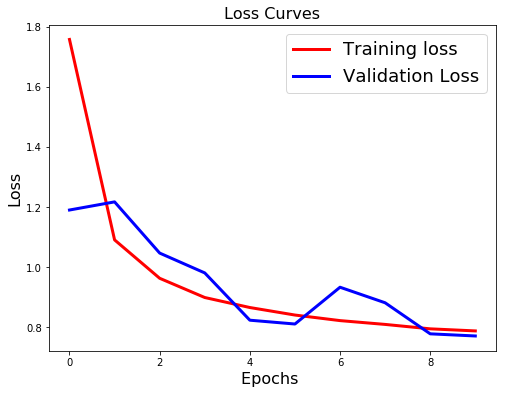

In [12]:
import matplotlib.pyplot as plt

# Loss Curves, residual sum of squares for classification and regression respectively.
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# the red curve must be upper the blue curve if overfitting is avoid

Text(0.5, 1.0, 'Accuracy Curves')

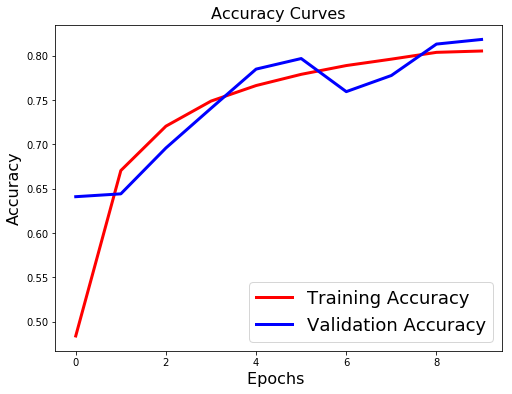

In [13]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16) #The blue curve must be the same as the red for the most efficient training. Surentrainement. A appris les données par coeur sans les comprendre. 

In [29]:
import pickle as pkl
from PIL import Image
import numpy as np

imgpil = Image.open("boeing-avion.jpg") 

img = np.array(imgpil)

#to save it
with open("train.pkl", "wb") as f:
    pkl.dump([x_train, y_train], f) #opened in non-text binary file, (for image file) 
    pkl.dump(img, f)
#to load it

with open("train.pkl", "rb") as f:
    x_train, y_train = pkl.load(f)
    avion =  pkl.load(f)


avion.shape

(2640, 3300, 3)

In [30]:
from resizeimage import resizeimage


# predicting images

imgpil = resizeimage.resize_contain(imgpil, [32, 32])
imgpil = np.array(imgpil)
imgpil = imgpil.astype("float") / 255.0
imgpil = np.expand_dims(imgpil, axis=0) #ajoute la 3eme dimension pour les 3 couleurs. 

predictions = model.predict_classes(imgpil)
predictions

array([0], dtype=int64)